In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("depression_dataset.csv")
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


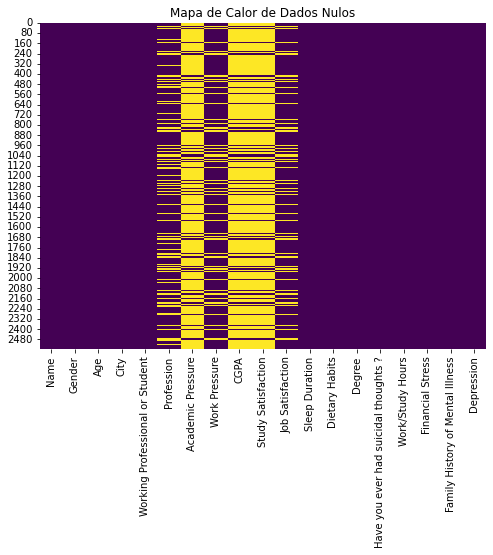

In [3]:
plt.figure(figsize=(8, 6))  
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)  
plt.title('Mapa de Calor de Dados Nulos')  
plt.show()  

In [4]:
px.box(df, x="Gender", y="Age", color="Depression", title="Relação entre gênero e idade com depressão")

In [5]:
px.histogram(df, x="Age", y="Job Satisfaction", color="Depression", barmode="overlay",
             title="Relação e distribuição entre insatisfação no trabalho, idade e depressão")

In [6]:
px.box(df, x="Depression", y="Job Satisfaction", color="Depression", title="Satisfação de trabalho e sua relação com a depressão")

In [7]:
px.histogram(df, x="Age", y="Work Pressure", color="Depression", barmode="overlay",
            title="Relação e distribuição entre pressão de trabalho, idade e depressão")

In [8]:
px.scatter(df, x="Age", y="Depression", title="Distribuição das idades das pessoas com e sem depressão")

In [9]:
px.scatter(df, x="Profession", y="Age", color="Depression", title="Presença de depressão nas profissões")

In [10]:
px.box(df, x="Depression", y="Work/Study Hours", color="Depression", title="Quantidade de horas trabalhadas e sua relação com a depressão")

In [11]:
px.box(df, x="Depression", y="Dietary Habits", color="Depression", title="Hábitos alimentares relacionados com a depressão")

In [12]:
px.box(df, x="Depression", y="Sleep Duration", color="Depression", title="Duração do sono relacionada com a depressão")

In [13]:
#Transformando coluna 'Gender' em variáveis numéricas

sex = pd.get_dummies(df['Gender'], dtype=int)
df[['Female', 'Male']] = sex
df.drop(['Gender', 'Female'], axis=1, inplace=True)
df.head()

,Name,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male
0,Pooja,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No,0
1,Reyansh,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,1
2,Manvi,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No,0
3,Isha,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,0
4,Aarav,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,1


In [14]:
#Transformando coluna 'Working Professional or Student' em variáveis numéricas

df.loc[df['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'
df['Profession'] = df['Profession'].fillna('Other')

worker_or_student = pd.get_dummies(df['Working Professional or Student'], dtype=int)
df[['Working Professional', 'Student']] = worker_or_student
df.drop(['Working Professional or Student', 'Working Professional'], axis=1, inplace=True)
df.head()

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
0,Pooja,37,Ghaziabad,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No,0,1
1,Reyansh,60,Kalyan,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,1,1
2,Manvi,42,Bhopal,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No,0,1
3,Isha,44,Thane,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,0,1
4,Aarav,48,Indore,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,1,1


In [15]:
#Transformando coluna 'Depression' em variáveis numéricas

depression = pd.get_dummies(df['Depression'], dtype=int)
df[['No', 'Depression']] = depression
df.drop('No', axis=1, inplace=True)
df.head()

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
0,Pooja,37,Ghaziabad,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,0,0,1
1,Reyansh,60,Kalyan,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,0,1,1
2,Manvi,42,Bhopal,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,0,0,1
3,Isha,44,Thane,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,0,0,1
4,Aarav,48,Indore,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,0,1,1


In [16]:
#Transformando coluna 'Depression' em variáveis numéricas

mental_illness_history_in_family = pd.get_dummies(df['Family History of Mental Illness'], dtype=int)
df[['No', 'Family History of Mental Illness']] = mental_illness_history_in_family
df.drop('No', axis=1, inplace=True)
df.head()

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
0,Pooja,37,Ghaziabad,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,0,0,0,1
1,Reyansh,60,Kalyan,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,1,0,1,1
2,Manvi,42,Bhopal,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,0,0,0,1
3,Isha,44,Thane,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,1,0,0,1
4,Aarav,48,Indore,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,1,0,1,1


In [17]:
#Transformando coluna 'Depression' em variáveis numéricas

suicidal_thoughts = pd.get_dummies(df['Have you ever had suicidal thoughts ?'], dtype=int)
df[['No', 'Have you ever had suicidal thoughts ?']] = suicidal_thoughts
df.drop('No', axis=1, inplace=True)
df.head()

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
0,Pooja,37,Ghaziabad,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,0,6,2,0,0,0,1
1,Reyansh,60,Kalyan,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,1,0,4,1,0,1,1
2,Manvi,42,Bhopal,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,0,0,2,0,0,0,1
3,Isha,44,Thane,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,1,1,2,1,0,0,1
4,Aarav,48,Indore,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,1,6,5,1,0,1,1


In [18]:
#Transformando coluna 'Dietary Habits' em variáveis numéricas

df['Dietary Habits'] = pd.Categorical(df['Dietary Habits'], categories=['Unhealthy', 'Moderate', 'Healthy'], ordered=True).codes + 1
df.head()

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
0,Pooja,37,Ghaziabad,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,2,MA,0,6,2,0,0,0,1
1,Reyansh,60,Kalyan,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,1,B.Com,1,0,4,1,0,1,1
2,Manvi,42,Bhopal,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,2,M.Com,0,0,2,0,0,0,1
3,Isha,44,Thane,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,3,MD,1,1,2,1,0,0,1
4,Aarav,48,Indore,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,2,BE,1,6,5,1,0,1,1


In [19]:
px.histogram(df, x="Age", y="Depression", title="Presença de depressão nas idades")

## Correlação dos dados

In [20]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,1.984351,0.488654,6.023865,2.968701,0.487089,0.178013,0.521518,0.803599
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,0.821286,0.499969,3.771743,1.415527,0.499931,0.382598,0.499635,0.397353
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,2.000000,0.000000,6.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,3.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
corr_academic = df[['Academic Pressure', 'Depression']].corr().iloc[0, 1]
corr_academic

0.47625917720292127

### Nota-se que conforme a pressão acadêmica aumenta, as pessoas que afirmaram ter depressão aumenta também

In [22]:
corr_age = df[['Age', 'Depression']].corr().iloc[0,1]
corr_age

-0.4851467361039801

### Porém conforme a idade aumenta, as respostas para depressão (Não = 0) diminuem

In [23]:
corr_study_statisfaction = df[['Study Satisfaction', 'Depression']].corr().iloc[0, 1]
corr_study_statisfaction

-0.29348374165983493

In [24]:
corr_job_satisfaction = df[['Job Satisfaction', 'Depression']].corr().iloc[0, 1]
corr_job_satisfaction

-0.16688026191473837

### Se a satisfação de estudos e trabalho aumentam, a depressão tende a aumentar mas com uma relação bem baixa.

In [25]:
corr_dietary_habits = df[['Dietary Habits', 'Depression']].corr().iloc[0, 1]
corr_dietary_habits

-0.10821544211227428

### Quanto mais saudável a pessoa é, menos relatam ter depressão.

In [26]:
corr_suicidal_thoughts = df[['Have you ever had suicidal thoughts ?', 'Depression']].corr().iloc[0, 1]
corr_suicidal_thoughts

0.2816685332241962

### Algumas pessoas que já tiveram pensamentos suicidas também confirmam ter depressão, mas a correlação é baixa. Talvez as pessoas só não queiram admitir, e podemos usar outras colunas para isso. Ou outro dataset.

In [27]:
corr_hours_study_work = df[['Work/Study Hours', 'Depression']].corr().iloc[0, 1]
corr_hours_study_work

0.15246480686392072

### Poucas pessoas com horas altas de trabalho/estudo acusaram ter depressão, mesmo que a correlação exista ainda é muito baixa.

In [28]:
corr_financial_stress = df[['Financial Stress', 'Depression']].corr().iloc[0, 1]
corr_financial_stress

0.16566867153408754

### Poucas pessoas com estresse financeiro grande tem depressão. Correlação positiva mas baixa.

In [29]:
corr_family_illness = df[['Family History of Mental Illness', 'Depression']].corr().iloc[0, 1]
corr_family_illness

0.019182278544470674

In [30]:
corr_gender = df[['Male', 'Depression']].corr().iloc[0, 1]
corr_gender

0.007594638714606088

In [31]:
corr_student = df[['Student', 'Depression']].corr().iloc[0, 1]
corr_student

-0.41870805057302596

In [32]:
df_positive_depression = df[(df['Depression'] == 1)]
df_positive_depression  

,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
14,Rahil,18,Ahmedabad,Other,NaN,3.0,NaN,NaN,1.0,More than 8 hours,1,Class 12,1,7,3,0,1,1,1
28,Ranveer,25,Rajkot,Student,1.0,NaN,7.21,3.0,NaN,5-6 hours,1,MBBS,1,10,4,0,1,1,0
40,Vivaan,19,Rajkot,Student,4.0,NaN,9.05,4.0,NaN,5-6 hours,1,Class 12,1,1,4,1,1,1,0
41,Anaya,34,Faridabad,Student,4.0,NaN,9.96,2.0,NaN,More than 8 hours,2,B.Com,1,6,2,0,1,0,0
43,Rashi,20,Pune,Student,4.0,NaN,6.17,1.0,NaN,More than 8 hours,3,Class 12,1,3,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,Siddharth,26,Indore,Student,5.0,NaN,10.00,2.0,NaN,More than 8 hours,1,B.Com,0,8,3,0,1,1,0
2531,Mahika,18,Indore,Other,NaN,4.0,NaN,NaN,2.0,Less than 5 hours,2,Class 12,0,2,4,1,1,0,1
2538,Nikhil,24,Jaipur,Student,2.0,NaN,6.39,1.0,NaN,Less than 5 hours,1,MCA,1,8,5,0,1,1,0
2552,Pihu,23,Pune,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,2,MA,1,8,3,0,1,0,1


In [33]:
df_positive_depression.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male,Student
count,455.000000,252.000000,203.000000,252.000000,252.000000,203.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.0,455.000000,455.000000
mean,26.263736,3.662698,3.866995,7.632937,2.674603,2.300493,1.793407,0.791209,7.259341,3.472527,0.507692,1.0,0.529670,0.446154
std,6.881686,1.227717,1.237630,1.455422,1.343892,1.347293,0.805515,0.406892,3.572841,1.374249,0.500491,0.0,0.499668,0.497639
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000
25%,21.000000,3.000000,3.000000,6.250000,1.750000,1.000000,1.000000,1.000000,4.000000,2.000000,0.000000,1.0,0.000000,0.000000
50%,25.000000,4.000000,4.000000,7.810000,3.000000,2.000000,2.000000,1.000000,8.000000,4.000000,1.000000,1.0,1.000000,0.000000
75%,30.000000,5.000000,5.000000,8.860000,4.000000,3.000000,2.000000,1.000000,10.000000,5.000000,1.000000,1.0,1.000000,1.000000
max,51.000000,5.000000,5.000000,10.000000,5.000000,5.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.0,1.000000,1.000000


### Pode ser feito uma análise com gráficos sobre a situação de quem tem depressão pra entendermos onde o padrão se repete usando o próprio desvio de padrão.

In [34]:
#Tratando dados faltantes

# Unindo as colunas de satisfação e pressão de trabalho e estudo

df['Satisfaction'] = df['Job Satisfaction'].fillna(df['Study Satisfaction'])
df['Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])
df.drop(columns=['Job Satisfaction', 'Study Satisfaction',
        'Academic Pressure', 'Work Pressure'], inplace=True)

# Preencher os dados faltantes de CGPA com a mediana
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].median())

In [35]:
sleep_duration_mapping={
    '7-8 hours': 7.5,
    '5-6 hours': 5.5,
    'More than 8 hours': 9,
    'Less than 5 hours': 4,
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_mapping)

In [36]:
df_ml = df.drop(columns=['Name', 'City', 'Profession', 'Degree'])

In [37]:
df_ml.to_csv("depression_dataset_treated.csv", index=False)